# This notebook calculates the species richness and alpha biodiversity indices (shannon index and simpson index) with window size equal to 5 (spatial resolution 150m x 150m for PRISMA)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [3]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_Sentinel = cwd + "\\ProcessedData"
cwd_Sentinel_Result = cwd + "\\Results"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [4]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_Sentinel)]:
    item = item + "Cropped"
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['2022 06Cropped', '2022 09Cropped']

In [5]:
window_Size = '150m'
df_Raster_6 = pd.read_csv(cwd_Sentinel_Result + "\\" + raster_Names[0] + "_StackedIndices_20VI\\\\AlphaDiversity" + window_Size + ".csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_Sentinel_Result + "\\" + raster_Names[1] + "_StackedIndices_20VI\\AlphaDiversity" + window_Size + ".csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson
0,FOR01,6.05,0,1.312132,0.641613
1,FOR02,5.15,0,1.226457,0.624533
2,FOR03,5.20,0,1.256478,0.659125
3,FOR04,6.75,0,1.799188,0.819468
4,FOR05,6.40,0,1.631622,0.781091


In [6]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,6.05,1.312132,0.641613,7.50,1.858276,0.823606
1,FOR02,5.15,1.226457,0.624533,5.15,1.243255,0.647965
2,FOR03,5.20,1.256478,0.659125,6.65,1.386130,0.661340
3,FOR04,6.75,1.799188,0.819468,5.45,1.335387,0.657003
4,FOR05,6.40,1.631622,0.781091,5.10,0.990985,0.490155


In [7]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,6.05,1.312132,0.641613,7.50,1.858276,0.823606
1,FOR02,5.15,1.226457,0.624533,5.15,1.243255,0.647965
2,FOR03,5.20,1.256478,0.659125,6.65,1.386130,0.661340
3,FOR04,6.75,1.799188,0.819468,5.45,1.335387,0.657003
4,FOR05,6.40,1.631622,0.781091,5.10,0.990985,0.490155


In [8]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [9]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,6.65,1.508753,0.721750,3.60,0.794317,0.441758,Prunus
59,FOR79,6.40,1.570822,0.757871,5.40,1.130472,0.580109,Mixed deciduous
60,FOR80,5.90,1.396261,0.683410,5.35,1.381747,0.712837,Mixed deciduous
61,FOR81,5.15,1.449380,0.742722,5.10,0.981968,0.504580,Mixed deciduous
62,FOR82,4.45,1.247448,0.676054,4.20,0.847588,0.447714,Mixed deciduous


## Species Richness

In [10]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [11]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [12]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,6.05,7.50
1,FOR02,7,Prunus,5.15,5.15
2,FOR03,4,Prunus,5.20,6.65
3,FOR04,2,Oak_open_canopy,6.75,5.45
4,FOR05,1,Oak_open_canopy,6.40,5.10


In [13]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,5.864286,6.023016
std,1.865415,1.474772,1.801675
min,1.000000,2.850000,1.050000
25%,2.000000,5.150000,4.950000
50%,3.000000,6.050000,6.100000
75%,4.000000,6.650000,7.325000
max,8.000000,10.750000,8.850000


In [14]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,6.35,7.25
19,FOR20,3,Alder,7.85,7.20
35,FOR55,2,Alder,4.80,6.65
7,FOR08,4,Alder,5.70,8.35
36,FOR56,2,Alder,7.65,8.10
...,...,...,...,...,...
24,FOR25,1,Pine,6.30,5.45
30,FOR31,2,Pine,3.85,3.80
58,FOR78,2,Prunus,6.65,3.60
2,FOR03,4,Prunus,5.20,6.65


In [15]:
list_Plot_Outlier = ['FOR72','FOR59','FOR51', 'FOR69','FOR29']
df_Richness_1_Asso_NoOut = df_Richness_1_Asso.copy()
# Drop those outliers! 
df_Richness_1_Asso_NoOut = df_Richness_1_Asso_NoOut[~df_Richness_1_Asso_NoOut['Plot'].isin(list_Plot_Outlier)]
df_Richness_1_Asso_NoOut.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,58.000000,58.000000,58.000000
mean,3.568966,5.878448,6.064655
std,1.826818,1.465723,1.650386
min,1.000000,2.850000,1.050000
25%,2.000000,5.150000,4.987500
50%,4.000000,6.100000,6.075000
75%,4.000000,6.650000,7.300000
max,8.000000,10.750000,8.850000


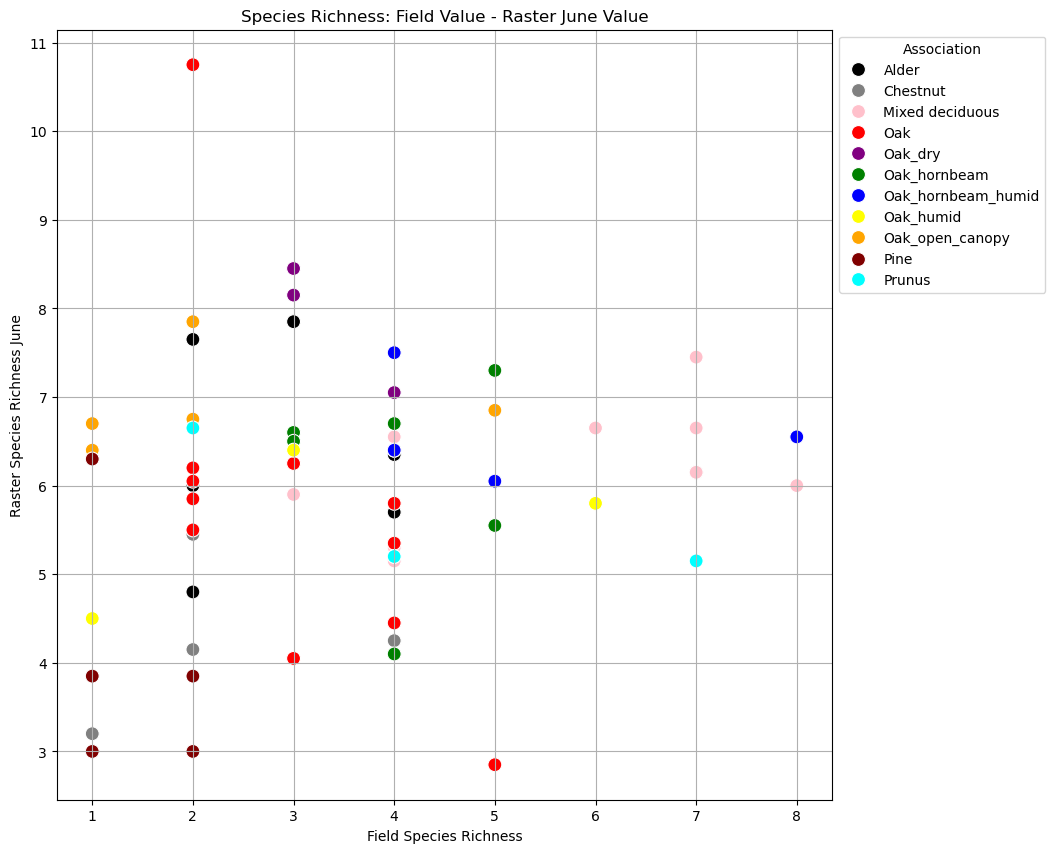

In [16]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

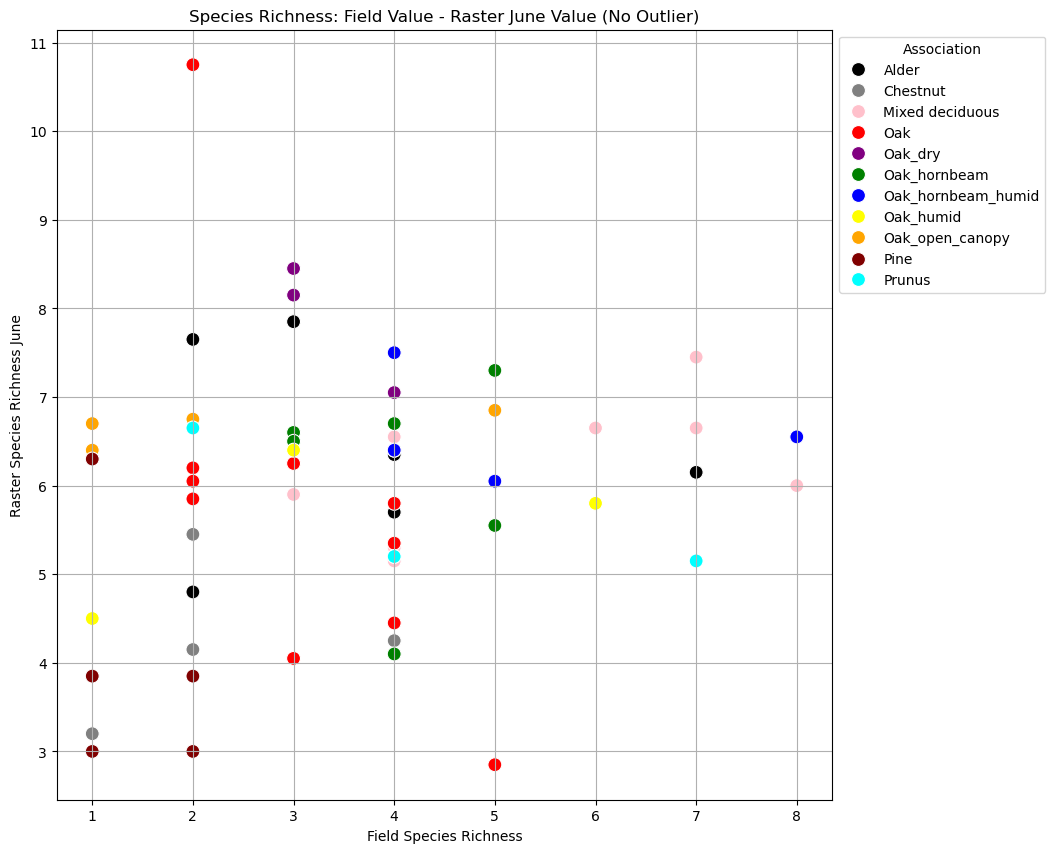

In [17]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso_NoOut, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value (No Outlier)')
plt.show()

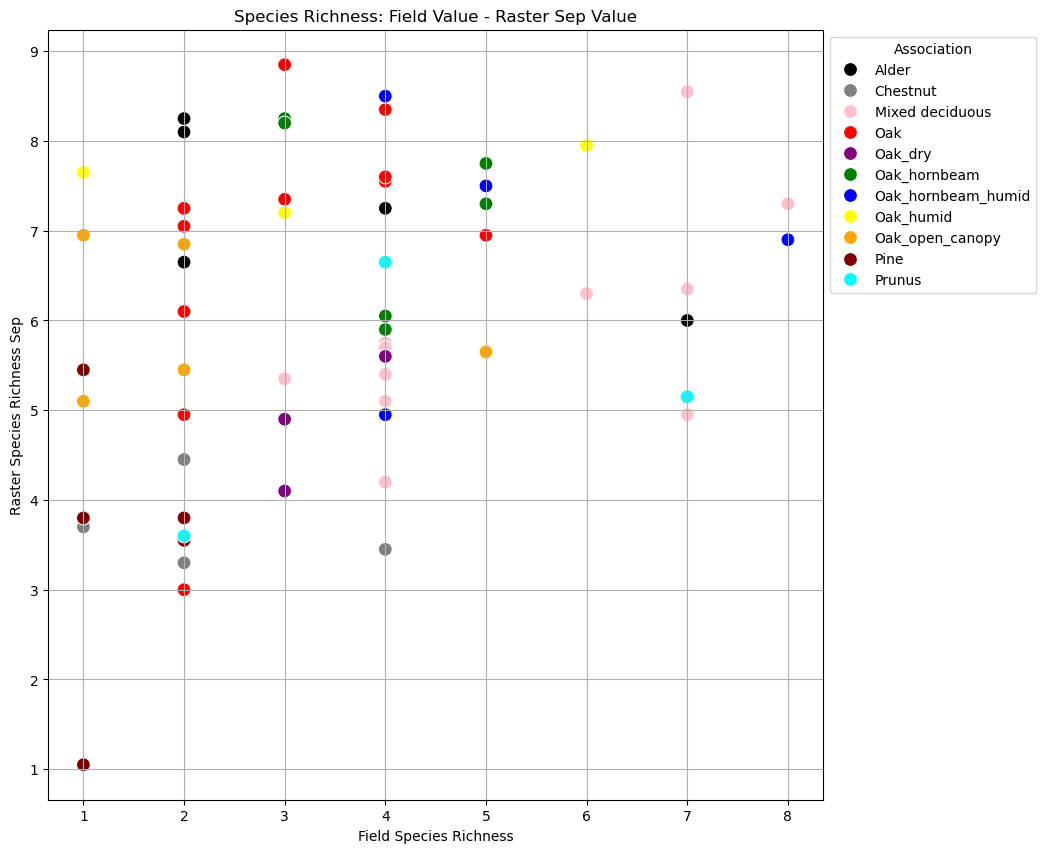

In [18]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [19]:
from scipy.spatial import distance
from scipy.stats import kendalltau
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

0.8350030548832074

In [20]:
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

0.6649608514941823

In [21]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-7.865096282013883
1.5461036045182815e-12
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.16499694511679264; the p value is 0.19626184007756745
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [22]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-7.50959138948945
1.4323979805819584e-11
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.14782240404121713; the p value is 0.2681331191700682
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [23]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-1.9854894423190124

In [24]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

2.6642857142857146

In [25]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-7.697500103330438
3.765158656033668e-12
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.33503914850581773; the p value is 0.007272670636936079
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [26]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.1:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!" + str(pear.pvalue))

-7.72024464383124
4.860954423732777e-12
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.28173229845976283; the p value is 0.03215255774615951
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [27]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-2.1327922675103013

In [28]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

2.7658730158730154

## Shannon

In [29]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [30]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [31]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,1.508753,0.794317
59,FOR79,1.344339,Mixed deciduous,1.570822,1.130472
60,FOR80,0.918320,Mixed deciduous,1.396261,1.381747
61,FOR81,1.301362,Mixed deciduous,1.449380,0.981968
62,FOR82,1.193337,Mixed deciduous,1.247448,0.847588


In [32]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,1.393907,1.229803
30,FOR31,0.146145,Pine,0.955073,0.892871
58,FOR78,0.286836,Prunus,1.508753,0.794317
2,FOR03,0.534923,Prunus,1.256478,1.386130
1,FOR02,1.604816,Prunus,1.226457,1.243255


In [33]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,63.000000,63.000000,63.000000
mean,0.793971,1.350544,1.371415
std,0.519653,0.348830,0.444805
min,0.000000,0.369099,0.007784
25%,0.401475,1.193874,1.141579
50%,0.804448,1.393907,1.415526
75%,1.180566,1.574919,1.733603
max,1.794190,2.217476,1.952086


In [34]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,1.376753,1.732776
19,FOR20,0.886464,Alder,1.592695,1.891097
35,FOR55,0.276191,Alder,1.158171,1.720774
7,FOR08,0.804448,Alder,1.249773,1.805700
36,FOR56,0.482578,Alder,1.676336,1.807921


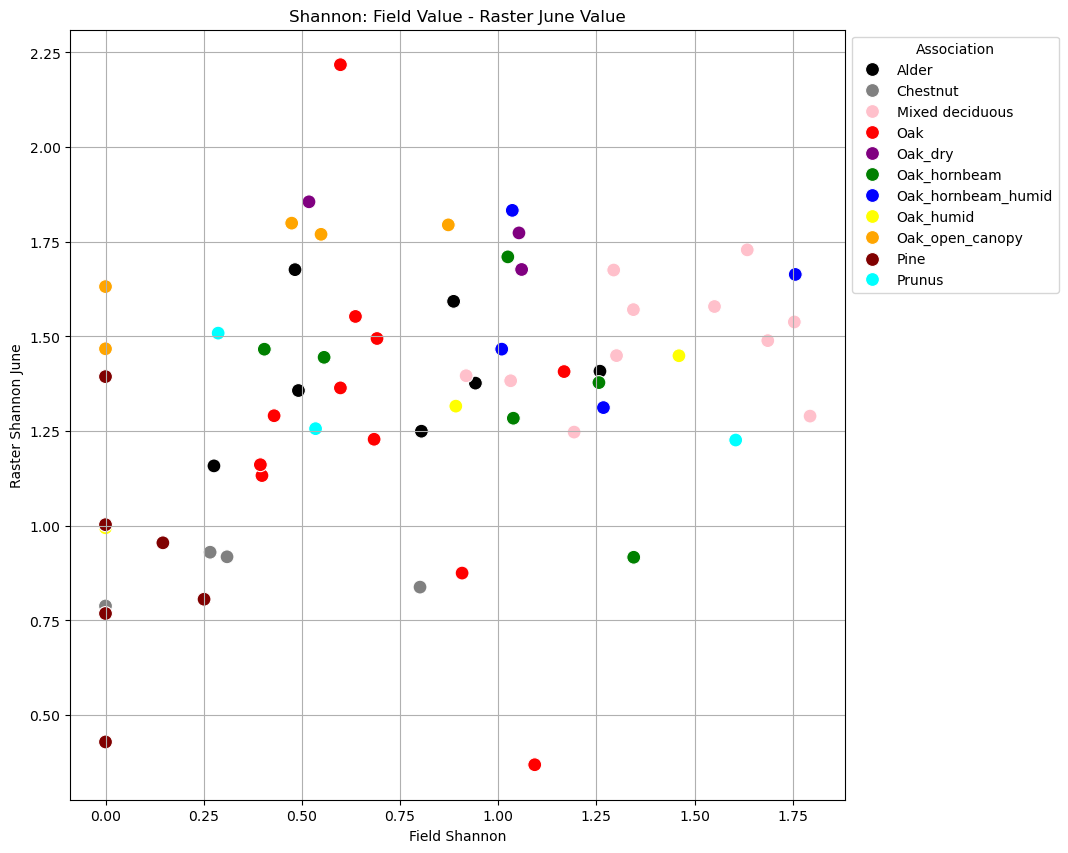

In [35]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [36]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.1:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-7.058362304889488
1.0553306886964138e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.3128965592151626; the p value is 0.01253026842588469
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [37]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-1.1961776294953506

In [38]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.6386566146433375

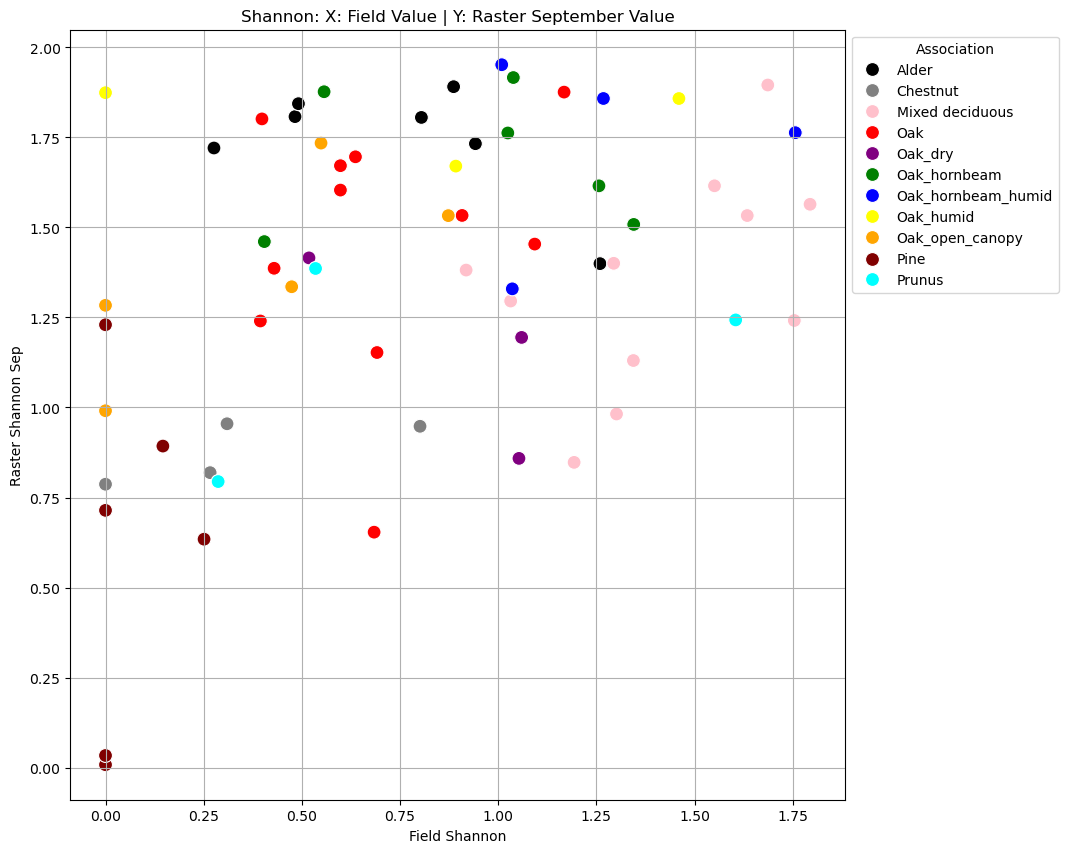

In [39]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [40]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-6.700517183364277
6.495271197717529e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.3982950936635762; the p value is 0.0012251454680527062
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [41]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-1.3055303817836843

In [42]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.6507261550232

In [43]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.6017049063364235

In [44]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.6871034407848373

In [45]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])
print(tau)
print(p_value)

0.22331680604284862
0.010137075737755531


In [46]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])
print(tau)
print(p_value)

0.232600183661258
0.007406308885030455


In [47]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness June'])
print(tau)
print(p_value)

0.11399871656338574
0.22077158086346338


In [48]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness Sep'])
print(tau)
print(p_value)

0.2438589621772858
0.008683415628016548
